#### Install & import Library


In [666]:
!pip install xgboost
!pip install fast_ml

# standard ML library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tambahan
import plotly.express as px

# Preprocess
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

sns.set(rc={'figure.figsize':(20,8)})
le = LabelEncoder()

# Tuning
from sklearn.model_selection import validation_curve, LeaveOneOut, train_test_split, cross_val_score, KFold, cross_validate, GridSearchCV
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, SelectFromModel
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from fast_ml.model_development import train_valid_test_split

# models
from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\aldip\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\aldip\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Load dataset

In [387]:
df_lelang = pd.read_csv('C:\\Users\\aldip\\Downloads\\lelang_kota_tangerang.csv', encoding='cp1252')



#### EDA

In [669]:
df_lelang

,KDOE_LELANG,NAMA_PAKET,SATKER,KUALIFIKASI,METODE,EVALUASI,JENIS,TAHUN,IS_GAGAL,HPS,JENIS_ENC,METODE_ENC,KUALIFIKASI_ENC,EVALUASI_ENC,HPS_ENC
0,24345066,PEMATANGAN LAHAN RUSUNAWA,PEMERINTAH DAERAH KOTA TANGERANG,PASCAKUALIFIKASI SATU FILE,TENDER,HARGA TERENDAH SISTEM GUGUR,PEKERJAAN KONSTRUKSI,2022,0,2.200000e+09,5,8,0,1,3
1,24338066,"PENGADAAN, PEMASANGAN POMPA LISTRIK DAN INSTAL...",PEMERINTAH DAERAH KOTA TANGERANG,PASCAKUALIFIKASI SATU FILE,TENDER,HARGA TERENDAH SISTEM GUGUR,PENGADAAN BARANG,2022,0,3.841000e+08,6,8,0,1,2
2,24337066,PENGADAAN DAN PEMASANGAN POMPA LISTRIK DAN INS...,PEMERINTAH DAERAH KOTA TANGERANG,PASCAKUALIFIKASI SATU FILE,TENDER,HARGA TERENDAH SISTEM GUGUR,PENGADAAN BARANG,2022,0,2.164000e+08,6,8,0,1,2
3,24336066,"PENGADAAN, PEMASANGAN POMPA LISTRIK DAN INSTAL...",PEMERINTAH DAERAH KOTA TANGERANG,PASCAKUALIFIKASI SATU FILE,TENDER,HARGA TERENDAH SISTEM GUGUR,PENGADAAN BARANG,2022,0,3.841000e+08,6,8,0,1,2
4,24335066,"PENGADAAN, PEMASANGAN POMPA LISTRIK DAN INSTAL...",PEMERINTAH DAERAH KOTA TANGERANG,PASCAKUALIFIKASI SATU FILE,TENDER,HARGA TERENDAH SISTEM GUGUR,PENGADAAN BARANG,2022,0,3.841000e+08,6,8,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,5066,PENGADAAN OBAT PADA KEGIATAN PENGADAAN OBAT DA...,KOTA TANGERANG,PASCAKUALIFIKASI SATU FILE,LELANG UMUM,HARGA TERENDAH SISTEM GUGUR,PENGADAAN BARANG,2010,0,7.354000e+08,6,2,0,1,2
8293,4066,PENGADAAN PAKAIAN DINAS DPRD KOTA TANGERANG,KOTA TANGERANG,PASCAKUALIFIKASI SATU FILE,LELANG UMUM,HARGA TERENDAH SISTEM GUGUR,PENGADAAN BARANG,2010,0,3.632000e+08,6,2,0,1,2
8294,3066,PENGADAAN MEUBELAIR KELURAHAN TAHUN ANGGARAN 2010,KOTA TANGERANG,PASCAKUALIFIKASI SATU FILE,LELANG UMUM,HARGA TERENDAH SISTEM GUGUR,PENGADAAN BARANG,2010,0,8.886000e+08,6,2,0,1,2
8295,2066,PENUNJANG TMMD,KOTA TANGERANG,PASCAKUALIFIKASI SATU FILE,LELANG UMUM,HARGA TERENDAH SISTEM GUGUR,PENGADAAN BARANG,2010,0,1.481000e+08,6,2,0,1,1


In [438]:
# tipe data
df_lelang.dtypes

KDOE_LELANG           int64
NAMA_PAKET           object
SATKER               object
KUALIFIKASI          object
METODE               object
EVALUASI             object
JENIS                object
TAHUN                 int64
IS_GAGAL           category
HPS                 float64
JENIS_ENC          category
METODE_ENC         category
KUALIFIKASI_ENC    category
EVALUASI_ENC       category
HPS_ENC            category
dtype: object

In [439]:
# desc statistik untuk variabel numerik
df_lelang.describe()

,KDOE_LELANG,TAHUN,HPS
count,8.276000e+03,8276.000000,8.276000e+03
mean,7.205778e+06,2015.810657,9.920671e+08
std,7.079831e+06,3.338402,2.687143e+09
min,1.066000e+03,2010.000000,1.000000e+05
25%,2.323816e+06,2013.000000,2.809750e+08
50%,4.528566e+06,2016.000000,4.000000e+08
75%,7.880316e+06,2018.000000,8.000000e+08
max,2.434507e+07,2022.000000,1.240000e+11


In [390]:
df_lelang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8297 entries, 0 to 8296
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KDOE_LELANG  8297 non-null   int64  
 1   NAMA_PAKET   8297 non-null   object 
 2   SATKER       8297 non-null   object 
 3   KUALIFIKASI  8297 non-null   object 
 4   METODE       8297 non-null   object 
 5   EVALUASI     8297 non-null   object 
 6   JENIS        8297 non-null   object 
 7   TAHUN        8297 non-null   int64  
 8   IS_GAGAL     8297 non-null   int64  
 9   HPS          8297 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 648.3+ KB


In [440]:
# missing value
df_lelang.isnull().sum()

KDOE_LELANG        0
NAMA_PAKET         0
SATKER             0
KUALIFIKASI        0
METODE             0
EVALUASI           0
JENIS              0
TAHUN              0
IS_GAGAL           0
HPS                0
JENIS_ENC          0
METODE_ENC         0
KUALIFIKASI_ENC    0
EVALUASI_ENC       0
HPS_ENC            0
dtype: int64

#### Data prep


##### Mencari data yang HPS-nya = 0

In [442]:
df_lelang.query("HPS == 0").shape #ada 15 records data yang HPS-nya 0


(0, 15)

##### Menghapus data yang HPS = 0

In [443]:
df_lelang = df_lelang.query("HPS != 0")


##### Ubah tipe data variable IS_GAGAl menjadi category

In [394]:
df_lelang['IS_GAGAL']=df_lelang['IS_GAGAL'].astype('category')

##### Transform variable JENIS menjadi category

In [395]:
df_lelang['JENIS'].unique()

array(['PEKERJAAN KONSTRUKSI', 'PENGADAAN BARANG',
       'JASA KONSULTANSI BADAN USAHA NON KONSTRUKSI',
       'JASA KONSULTANSI BADAN USAHA KONSTRUKSI', 'JASA LAINNYA',
       'JASA KONSULTANSI BADAN USAHA', 'JASA KONSULTANSI PERORANGAN'],
      dtype=object)

In [396]:

df_lelang['JENIS_ENC'] = le.fit_transform(df_lelang['JENIS'])
df_lelang['JENIS_ENC'] = df_lelang['JENIS_ENC'].astype('category')
df_lelang['JENIS_ENC'].unique()
#df_lelang[['KDOE_LELANG','JENIS','JENIS_ENC']].sample(3)

[5, 6, 2, 1, 4, 0, 3]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

##### Transform variable METODE menjadi category

In [397]:
df_lelang['METODE'].unique()

array(['TENDER', 'SELEKSI', 'PENGADAAN LANGSUNG', 'TENDER CEPAT',
       'LELANG PEMILIHAN LANGSUNG', 'LELANG SEDERHANA', 'LELANG UMUM',
       'SELEKSI SEDERHANA', 'SELEKSI UMUM', 'SELEKSI CEPAT'], dtype=object)

In [398]:

df_lelang['METODE_ENC'] = le.fit_transform(df_lelang['METODE'])
df_lelang['METODE_ENC'] = df_lelang['METODE_ENC'].astype('category')
df_lelang['METODE_ENC'].unique()
# df_lelang[['KDOE_LELANG','METODE','METODE_ENC']].sample(3)

[8, 4, 3, 9, 0, 1, 2, 6, 7, 5]
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

##### Transform variable KUALIFIKASI menjadi category

In [399]:
df_lelang['KUALIFIKASI'].unique()

array(['PASCAKUALIFIKASI SATU FILE', 'PRAKUALIFIKASI DUA FILE',
       'PRAKUALIFIKASI SATU FILE'], dtype=object)

In [400]:
df_lelang['KUALIFIKASI_ENC'] = le.fit_transform(df_lelang['KUALIFIKASI'])
df_lelang['KUALIFIKASI_ENC'] = df_lelang['KUALIFIKASI_ENC'].astype('category')
df_lelang['KUALIFIKASI_ENC'].unique()
# df_lelang[['KDOE_LELANG','METODE','METODE_ENC','KUALIFIKASI','KUALIFIKASI_ENC']].sample(3)

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

##### Transform variable EVALUASI menjadi category

In [401]:
df_lelang['EVALUASI'].unique()

array(['HARGA TERENDAH SISTEM GUGUR', 'KUALITAS DAN BIAYA',
       'PAGU ANGGARAN', 'KUALITAS', 'BIAYA TERENDAH', 'SISTEM NILAI'],
      dtype=object)

In [445]:
df_lelang['EVALUASI_ENC'] = le.fit_transform(df_lelang['EVALUASI'])
df_lelang['EVALUASI_ENC'] = df_lelang['EVALUASI_ENC'].astype('category')
df_lelang['EVALUASI_ENC'].unique()
# df_lelang[['KDOE_LELANG','METODE','METODE_ENC','EVALUASI','EVALUASI_ENC']].sample(3)

[1, 3, 4, 2, 0, 5]
Categories (6, int64): [0, 1, 2, 3, 4, 5]

##### Transform variable HPS menjadi 6 class (kategori)

In [446]:
# binning untuk variable HPS
# 0 - 200 jt
# 200 jt - 1M
# 1M - 10M
# 10M - 25M
# 25M - 50M
# >50M

class_HPS = [0, 200000000, 1000000000, 10000000000, 25000000000, 50000000000, 200000000000]
#HPS_label = ['<200 JT', '<1M', '<10M','<25M','<50M','>50M']
HPS_label = ['1', '2', '3','4','5','6']
df_lelang['HPS_ENC'] = pd.cut(df_lelang['HPS'], bins=class_HPS, labels=HPS_label, include_lowest=True)

##### Cek missing value setelah transform

In [447]:
df_lelang.isnull().sum()

KDOE_LELANG        0
NAMA_PAKET         0
SATKER             0
KUALIFIKASI        0
METODE             0
EVALUASI           0
JENIS              0
TAHUN              0
IS_GAGAL           0
HPS                0
JENIS_ENC          0
METODE_ENC         0
KUALIFIKASI_ENC    0
EVALUASI_ENC       0
HPS_ENC            0
dtype: int64

In [404]:
# One Hot Encoding untuk kolom EVALUASI

# from sklearn.preprocessing import OneHotEncoder
# ohc = OneHotEncoder(handle_unknown='ignore')
# new_features = ohc.fit_transform(df_lelang[['EVALUASI']])
# cols_name= [x for x in df_lelang['EVALUASI'].unique()]
# df_lelang_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)
# df_lelang_ohc.sample(3)



In [405]:
# menggabungkan kolom hasil OHE ke dataframe awal
# df_lelang = pd.concat([df_lelang, df_lelang_ohc], axis=1)
# df_lelang.sample(5)

### Visualisasi data lelang gagal vs sukses

0    7743
1     533
Name: IS_GAGAL, dtype: int64


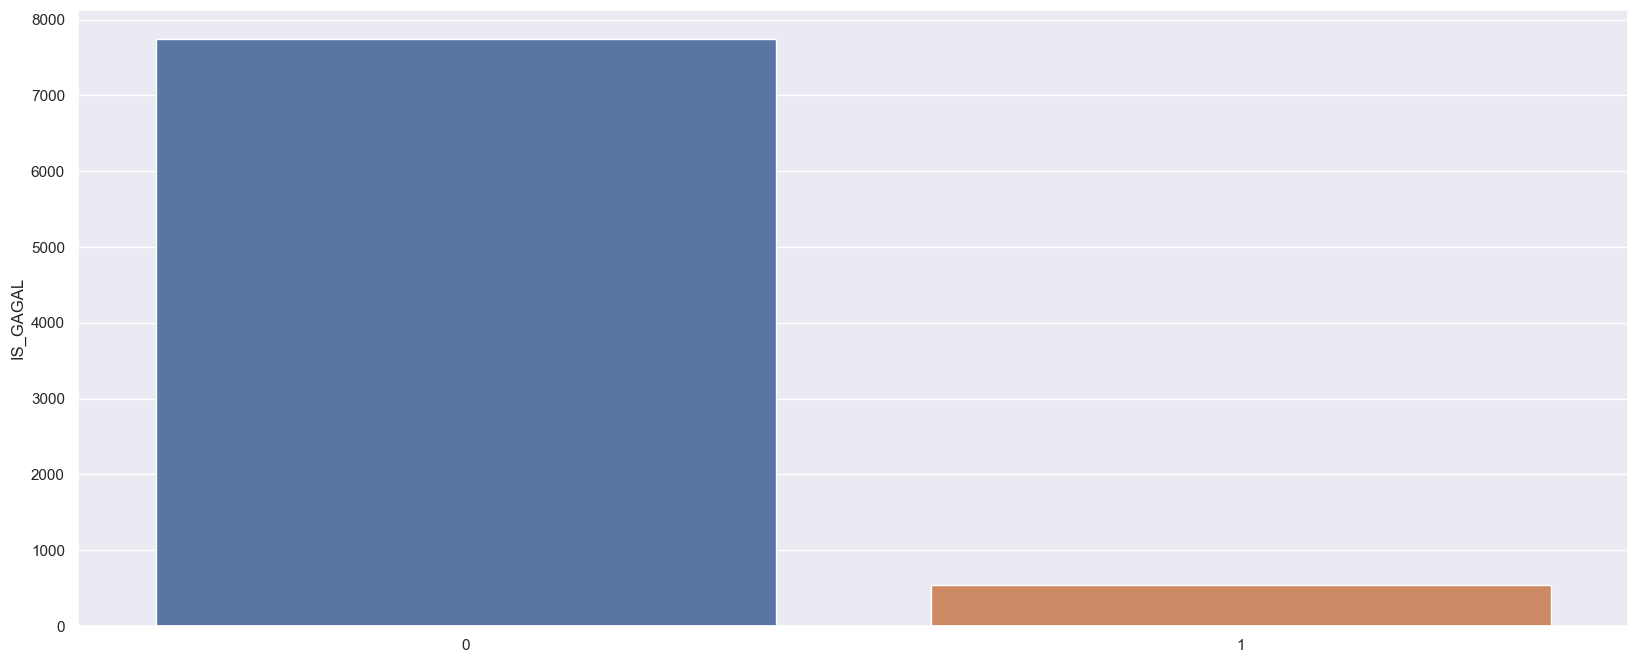

In [409]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,8)})

sns.barplot(x=df_lelang['IS_GAGAL'].value_counts().index, y=df_lelang['IS_GAGAL'].value_counts())
print(df_lelang['IS_GAGAL'].value_counts())

### Modelling 

In [651]:
# pilih variable yang akan digunakan
df_lelang_model = df_lelang[
    ['KDOE_LELANG',
    # 'NAMA_PAKET',
     'JENIS_ENC',
     'METODE_ENC',
     'KUALIFIKASI_ENC',
     'HPS_ENC',
     'IS_GAGAL']]


In [652]:
# Definisikan target variable
X_train = df_lelang_model.drop('IS_GAGAL',axis=1) # feature
y_train = df_lelang_model['IS_GAGAL'] # target

In [654]:
# split tdata menjadi training dan testing
#X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
print(x_train.shape, y_train.shape, x_eval.shape, y_eval.shape) 

(5807, 11) (8276,) (1058, 11) (1242,)


In [655]:
# split tdata menjadi training dan testing

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_lelang_model, 
                                                                            target = 'IS_GAGAL', 
                                                                            train_size=0.7,) 
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(5793, 5) (5793,) (1241, 5) (1241,) (1242, 5) (1242,)


In [667]:
models = {
          #'Perc': Perceptron(),
          'DT': DecisionTreeClassifier(),
          'KNN': KNeighborsClassifier(),
          #'NB': GaussianNB(), 
          'SVC': SVC(),
          #'Vot': VotingClassifier(), 
          #'Stack': StackingClassifier(), 
          'RandF': RandomForestClassifier(), 
          'Ada': AdaBoostClassifier(),
          #'XG': XGBClassifier(enable_categorical=True)
          }

for name, model in models.items():
  # fit model pada data training
  model.fit(X_train,y_train)

  # hitung metric performa
  prediction = model.predict(X_valid)
  score = accuracy_score(y_valid, prediction)
  # print(type(score))
  print ("Accuracy",name, "Hold Out : ", score)

Accuracy DT Hold Out :  0.9331184528605962
Accuracy KNN Hold Out :  0.9548751007252216
Accuracy SVC Hold Out :  0.9508460918614021
Accuracy RandF Hold Out :  0.935535858178888
Accuracy Ada Hold Out :  0.9500402900886382


In [660]:
accuracy=[]
scores_kfold=[]
folds = KFold(n_splits = 15, shuffle = True, random_state = 42)
for name, model in models.items():
    #scores_kfold = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=folds)
    scores_kfold = cross_validate(model, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)
    #accuracy = [name, scores_kfold['train_score'], scores_kfold['test_score']]
    # accuracy.append(name)
    print ("Accuracy K-Fold",  name, ":", scores_kfold['train_score'], scores_kfold['test_score'])
     
    # print(type(scores_kfold))
    # print ("Accuracy K-Fold",  name, ":", np.average(scores_kfold))
    #result = pd.Series(name, scores_kfold)
    # ("Accuracy K-Fold",  name, ":", scores_kfold)    


Accuracy K-Fold DT : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0.9121447  0.91731266 0.90697674 0.93005181 0.91968912 0.94559585
 0.94041451 0.92746114 0.93523316 0.92487047 0.90414508 0.92227979
 0.91968912 0.94818653 0.90673575]
Accuracy K-Fold KNN : [0.95190529 0.95338513 0.95246023 0.95302386 0.95209913 0.95154429
 0.95302386 0.95172924 0.95080451 0.95246902 0.95505826 0.95283891
 0.95283891 0.95283891 0.95154429] [0.9379845  0.93281654 0.93281654 0.94559585 0.9611399  0.95854922
 0.94559585 0.94300518 0.93523316 0.9507772  0.92746114 0.93264249
 0.93523316 0.94559585 0.94041451]
Accuracy K-Fold SVC : [0.93211247 0.93211247 0.93192749 0.93138524 0.93027557 0.93194008
 0.93138524 0.93138524 0.93138524 0.93101535 0.93230997 0.93157019
 0.93249491 0.93157019 0.93175513] [0.9250646  0.9250646  0.92764858 0.93523316 0.9507772  0.92746114
 0.93523316 0.93523316 0.93523316 0.94041451 0.92227979 0.93264249
 0.91968912 0.93264249 0.93005181]
Accuracy K-Fold RandF : [0.99981502 0.99981

In [662]:
#Perbandingan Model
#model_lr = LogisticRegression()
#model_nb = GaussianNB()
# model_dt = DecisionTreeClassifier(),
DT =  DecisionTreeClassifier()
KNN =  KNeighborsClassifier()
SVC =  SVC()
RandF = RandomForestClassifier()
Ada = AdaBoostClassifier()
# pendekatan cv lain nya untuk dapat melihat score validasi dan training
#score_lr = cross_validate(model_lr, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)
#score_nb = cross_validate(model_nb, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)
score_dt = cross_validate(DT, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)
score_knn = cross_validate(KNN, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)
score_svc = cross_validate(SVC, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)
score_randf = cross_validate(RandF, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)
score_ada = cross_validate(Ada, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)




KNN Train         0.952504
KNN Test          0.941657
RandF Train       0.999864
RandF Test        0.927328
SVC Train         0.931642
SVC Test          0.931645
Adaboost Train    0.937166
Adaboost Test     0.934752
DT Train          1.000000
DT Test           0.923533
dtype: float64

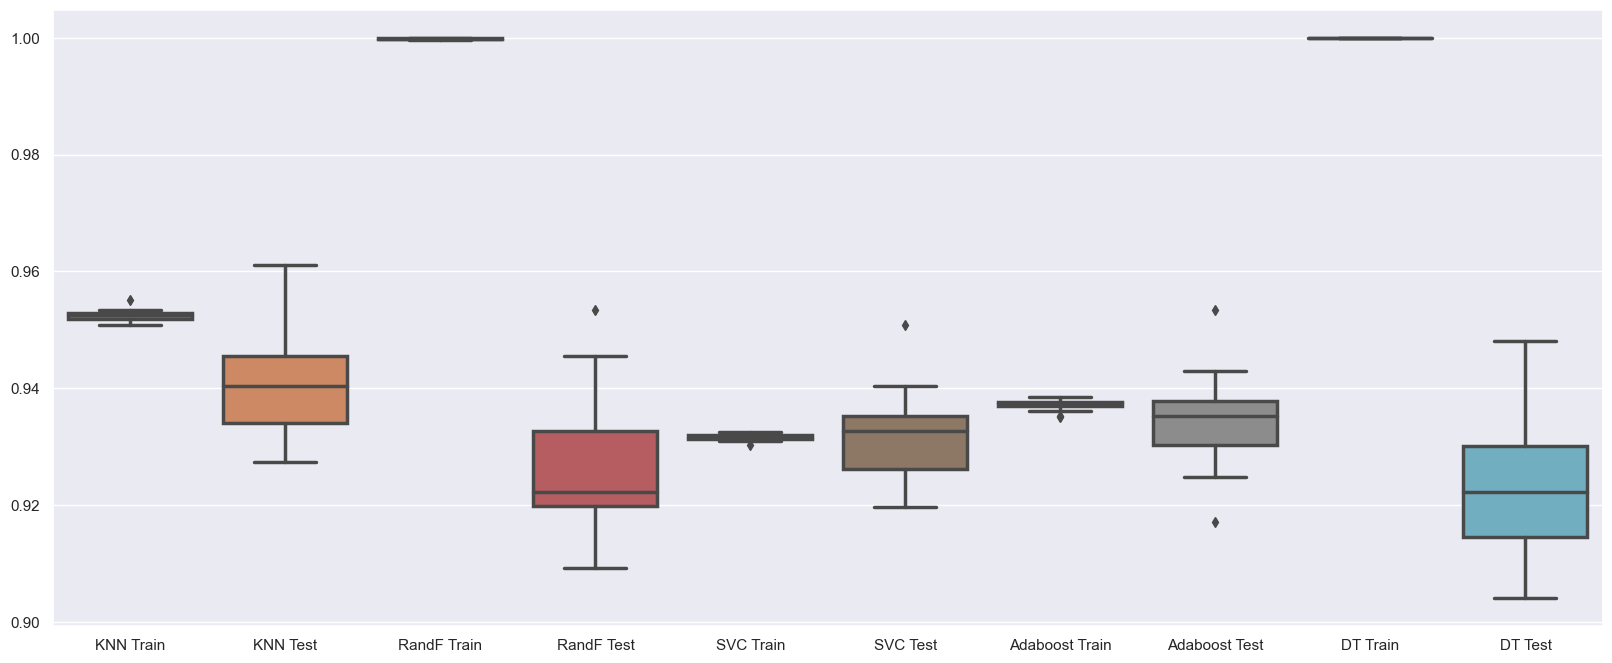

In [664]:
column = {'KNN Train': score_knn['train_score'], 'KNN Test': score_knn['test_score'],
          'RandF Train': score_randf['train_score'], 'RandF Test': score_randf['test_score'],
          'SVC Train': score_svc['train_score'], 'SVC Test': score_svc['test_score'],
          'Adaboost Train': score_ada['train_score'], 'Adaboost Test': score_ada['test_score'],
          'DT Train': score_dt['train_score'], 'DT Test': score_dt['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

# 3 model terbaik adalah KNN, adaboost, dan SVM
# Random Forest dan Decision Tree overfit

### Prediction

In [ ]:
submit_predict = model.predict(x_test)